In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()
df.info()
df.describe()

df.isnull().sum()
df[df['Churn']==0][['Churn Category','Churn Reason']].isnull().sum() #check if Churn Category and Churn Reason NaN values match non Churn clients (0)
df['Churn Category'] = df['Churn Category'].fillna('Active User') #replace NaN value to Active User
df['Churn Reason'] = df['Churn Reason'].fillna('Active User')

df[df['Internet Type'].isnull()]['Internet Service'].value_counts() #check if the amount of Internet Type NaN values match the Internet Service 0s amount
df['Internet Type'] = df['Internet Type'].fillna('No Internet Service') #replace NaN value if no Internet Service used

df['Offer'] = df['Offer'].fillna('No offer')
df.duplicated().sum() #no duplicates
df.to_csv('cleaned_churn_data.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

In [ ]:
#Exploratory Data Analysis

statistics_churn = df['Churn'].describe().round(2)
avg_retention_rate = 1 - df['Churn'].mean().round(2)

print('Churn Statistics - \n', statistics_churn )
print('-'*20,'\n')
print('Average Churn Rate -', df['Churn'].mean().round(2))
print('Average Retention Rate - ', avg_retention_rate)

#Revenue Churn
churned_customers = df[df['Customer Status'] == 'Churned']
total_revenue_lost = churned_customers['Total Revenue'].sum().round(2)
total_revenue = df['Total Revenue'].sum()
revenue_churn_percent = (total_revenue_lost/total_revenue).round(2)*100
print('Revenue Churn ($) - ', total_revenue_lost)
print('Revenue Churn (%) - ', revenue_churn_percent )

Churn Statistics - 
 count    4225.00
mean        0.27
std         0.44
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         1.00
Name: Churn, dtype: float64
-------------------- 

Average Churn Rate - 0.27
Average Retention Rate -  0.73
Revenue Churn ($) -  2181556.11
Revenue Churn (%) -  17.0


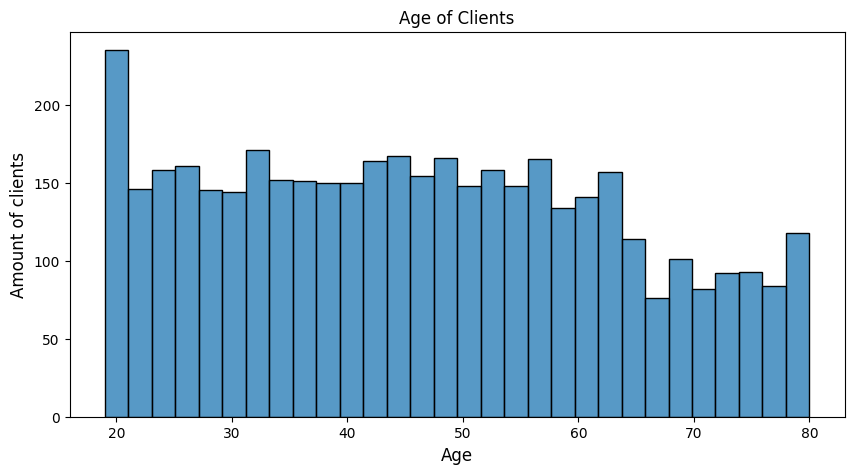

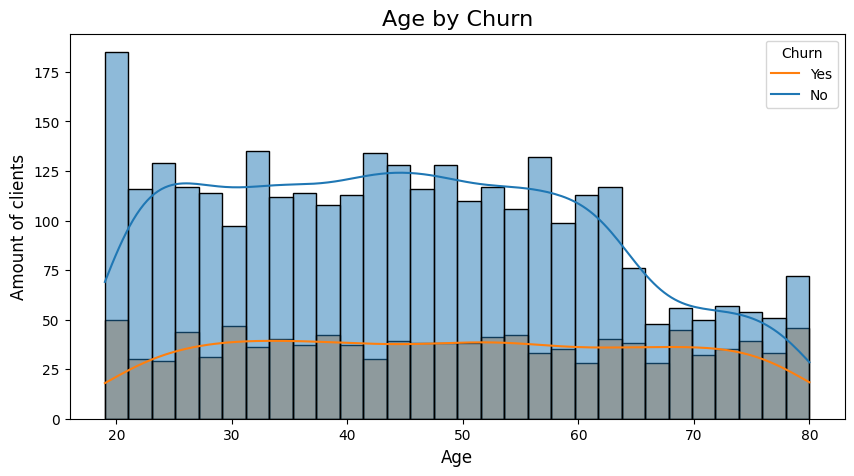

In [ ]:
#Demographical Factors

#Churn Rate by Age

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=30)
plt.title('Age of Clients')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount of clients', fontsize=12)

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Churn', bins=30, kde=True )
plt.title('Age by Churn', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Amount of clients', fontsize=12)
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.show()


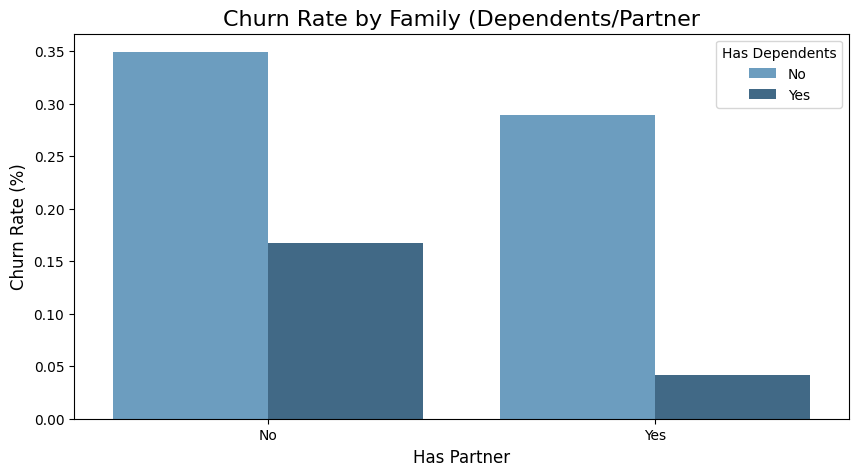

In [ ]:
#Churn Rate by Family (Dependents/Partner)

df['Dependents']=df['Dependents'].replace({1:'Yes', 0:'No'})
df['Partner']=df['Partner'].replace({1:'Yes', 0:'No'}) #replace 1 and 0 to Yes and Now

churn_by_family = df.groupby(['Dependents', 'Partner'])['Churn'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=churn_by_family, hue='Dependents',x='Partner', y='Churn', palette='Blues_d')
plt.title('Churn Rate by Family (Dependents/Partner', fontsize=16)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xlabel('Has Partner', fontsize=12)
plt.legend(title='Has Dependents')
plt.show()


In [ ]:
#Churn Rate by Category and visualization Function

def calculate_and_plot_churn_rate(dataframe,column_name,title):
  churn_by_category = df.groupby(column_name)['Churn'].mean().sort_values(ascending=False)
  print(f'Churn Rate by category: {column_name}')
  print(churn_by_category.to_string(float_format="{:.2%}".format))

  plt.figure(figsize=(10, 5))
  sns.barplot(hue=churn_by_category.index, y=churn_by_category.values, palette='Blues_d', legend='full')
  plt.title(title, fontsize=16)
  plt.ylabel('Churn Rate (%)', fontsize=12)
  plt.xlabel(column_name, fontsize=12)
  plt.show()


Churn Rate by category: Contract
Contract
Month-to-Month   45.46%
One Year         10.73%
Two Year          2.39%


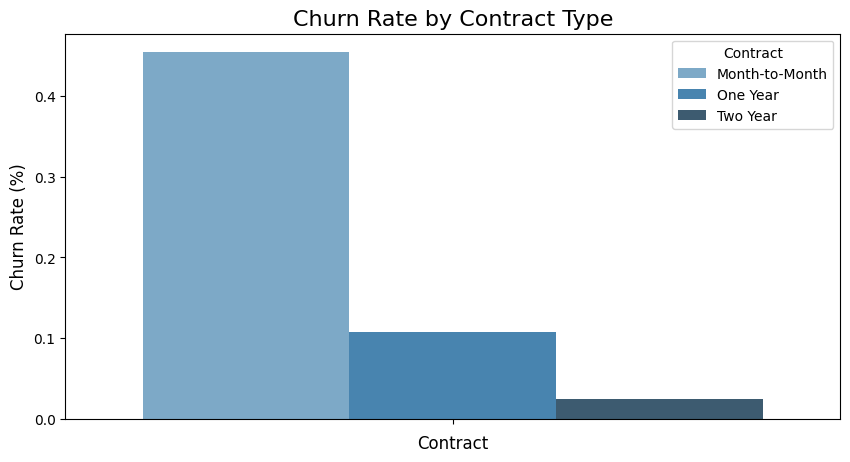

Churn Rate by category: Internet Type
Internet Type
Fiber Optic           40.08%
Cable                 24.70%
DSL                   19.84%
No Internet Service    7.22%


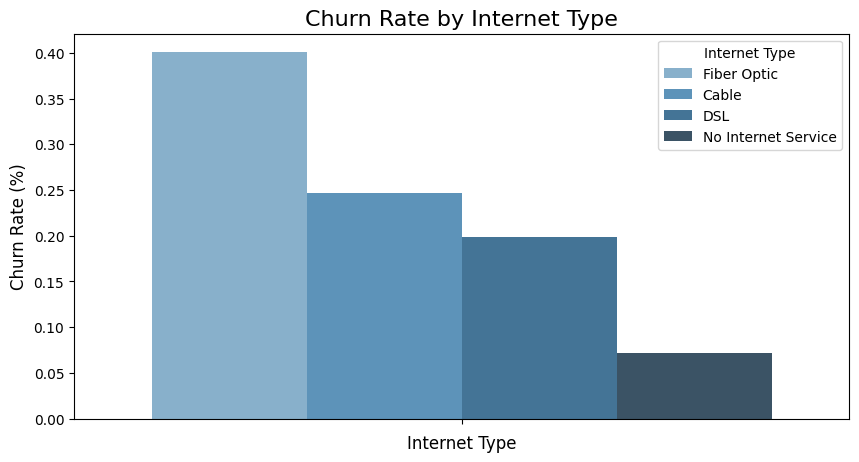

In [ ]:
#Service Related Factors

#Churn Rate by Contract Type
calculate_and_plot_churn_rate(df,'Contract','Churn Rate by Contract Type')

#Churn Rate by Internet Type
calculate_and_plot_churn_rate(df,'Internet Type','Churn Rate by Internet Type')

<Figure size 1000x500 with 0 Axes>

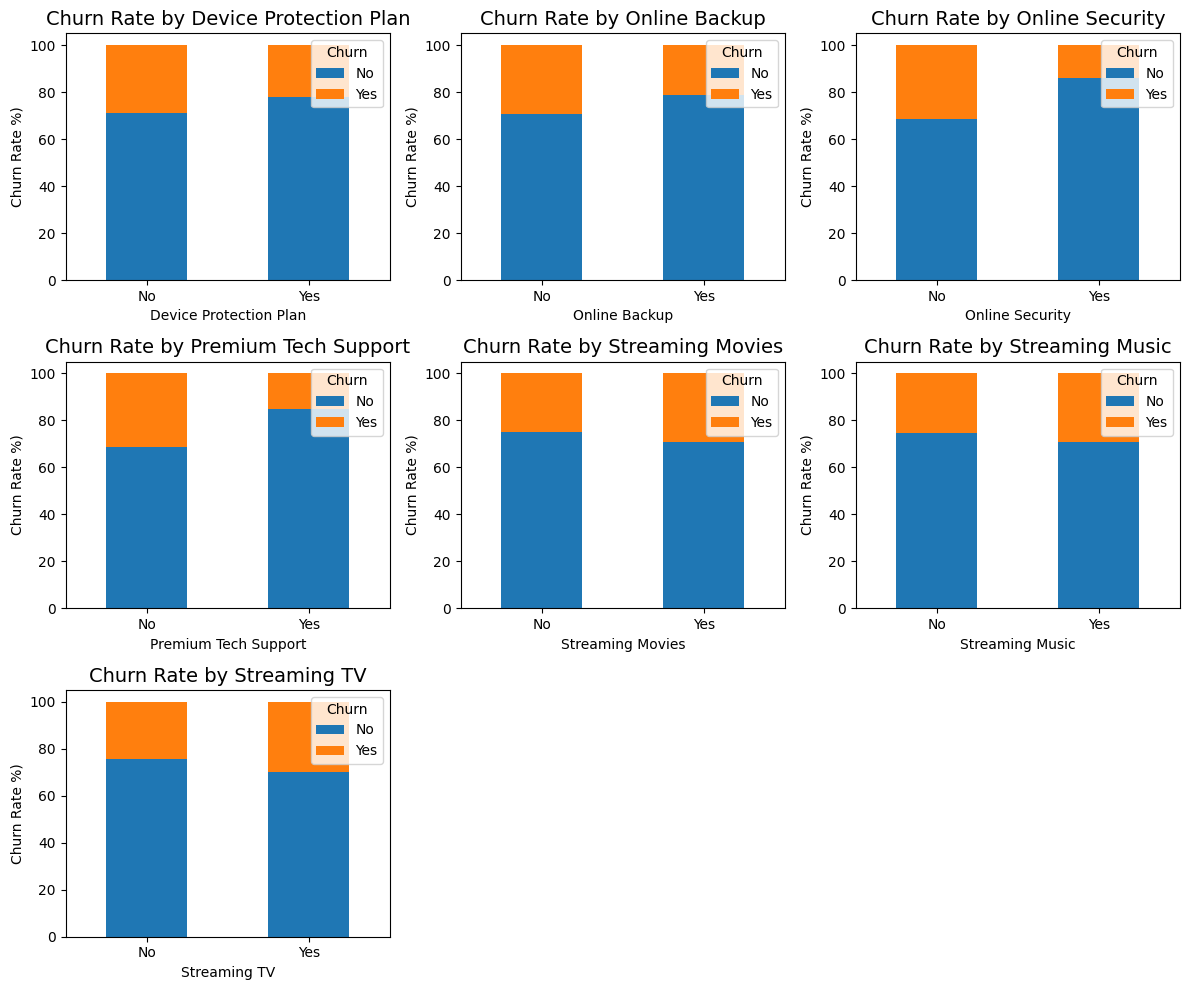

In [ ]:
#Churn Rate by Additional Services

additional_services = [
    'Device Protection Plan',
    'Online Backup',
    'Online Security',
    'Premium Tech Support',
    'Streaming Movies',
    'Streaming Music',
    'Streaming TV'     ]

plt.figure(figsize=(10, 5))

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes_flat = axes.flatten()

for i, col in enumerate(additional_services):
  ax = axes_flat[i]
  ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
  colors = sns.color_palette('Paired', n_colors=2)
  ct.plot(kind='bar', stacked=True, ax=ax)
  ax.set_title(f'Churn Rate by {col}', fontsize=14)
  ax.set_xlabel(f'{col}')
  ax.set_xticklabels(['No', 'Yes'])
  ax.set_ylabel('Churn Rate %)')
  ax.tick_params(axis='x', rotation=0)
  ax.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')


axes_flat[-2].axis('off')
axes_flat[-1].axis('off')

plt.tight_layout()
plt.show()



Churn Rate by category: Additional Services
Additional Services
1   43.35%
2   36.81%
3   31.39%
4   28.10%
0   20.84%
5   20.78%
6   12.20%
7    4.97%


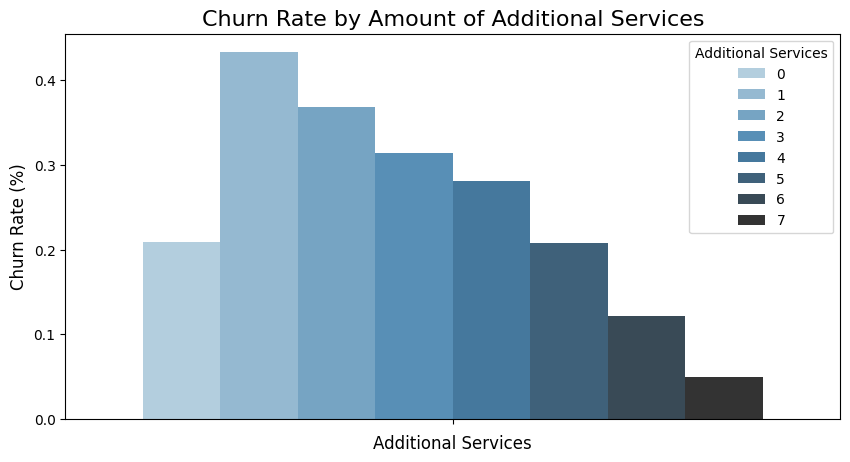

In [ ]:
df['Additional Services'] = df[additional_services].sum(axis=1)
calculate_and_plot_churn_rate(df,'Additional Services','Churn Rate by Amount of Additional Services')

Churn Rate by category: Payment Method
Payment Method
Mailed Check      35.00%
Bank Withdrawal   33.63%
Credit Card       15.60%


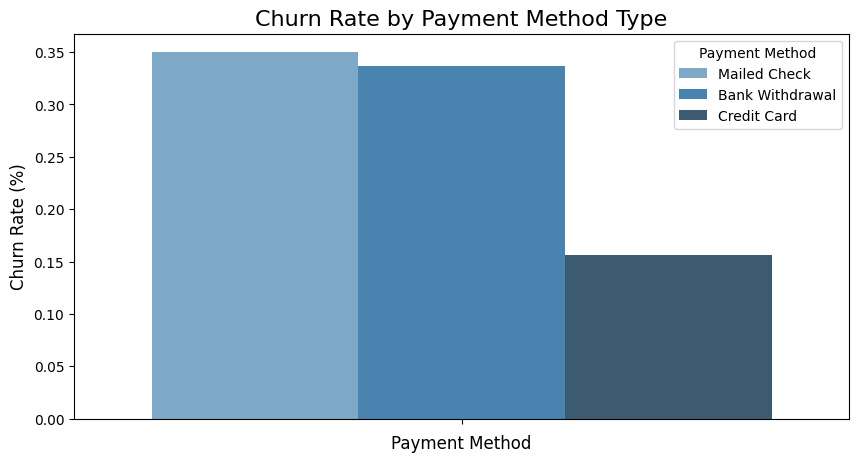

Churn Rate by category: Offer
Offer
Offer E    54.53%
Offer D    27.27%
No offer   26.89%
Offer C    24.30%
Offer B    12.43%
Offer A     5.96%


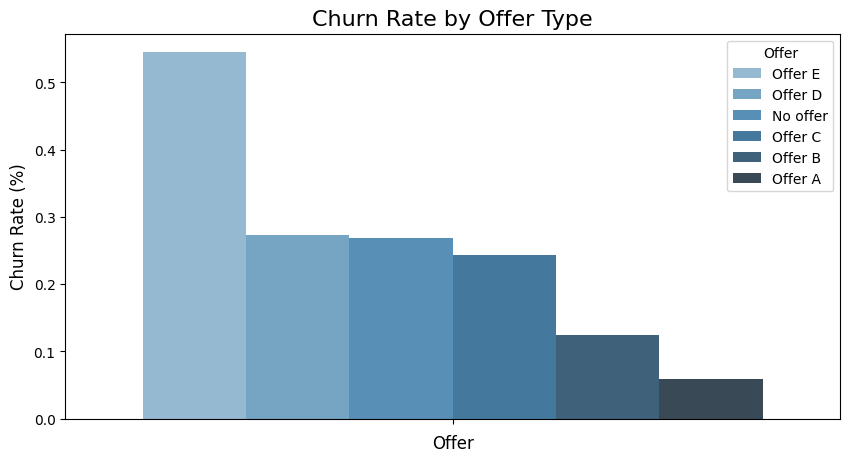

In [ ]:
#Financial Factors

#Churn Rate by Payment Method
calculate_and_plot_churn_rate(df,'Payment Method','Churn Rate by Payment Method Type')

#Churn Rate by Offer Type
calculate_and_plot_churn_rate(df,'Offer','Churn Rate by Offer Type')

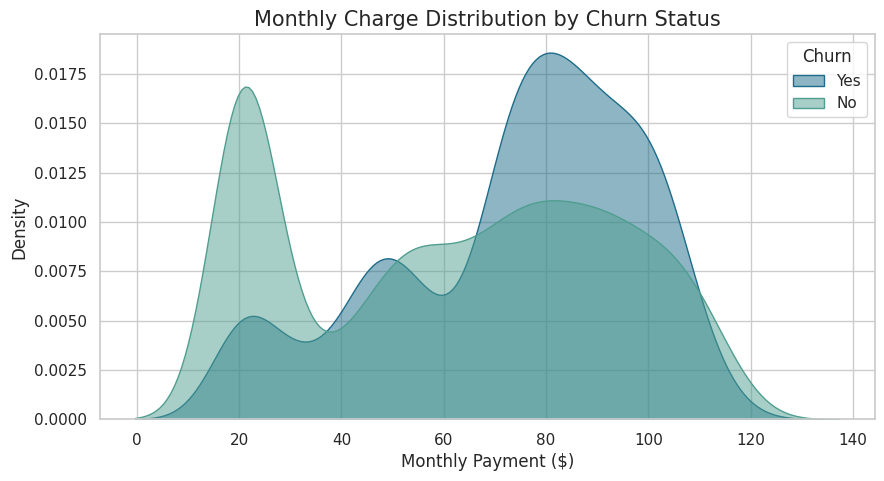

In [ ]:
#Monthly Charge Distribution by Churn Status

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Monthly Charge', hue='Churn', fill=True, common_norm=False, palette='crest', alpha=0.5)

plt.title('Monthly Charge Distribution by Churn Status', fontsize=15)
plt.xlabel('Monthly Payment ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Churn', labels=['Yes', 'No'], loc='upper right')
plt.show()


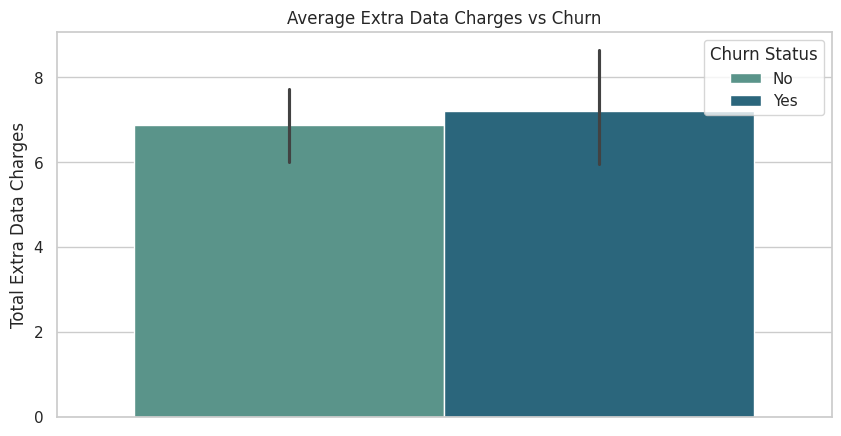

In [ ]:
#Churn Rate by Total Extra Data Charges

plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, hue='Churn', y='Total Extra Data Charges',  palette='crest', legend=True)
plt.title('Average Extra Data Charges vs Churn')
h, l = ax.get_legend_handles_labels()
ax.legend(h, ['No', 'Yes'], title='Churn Status', loc='upper right')
plt.show()

               Total Revenue      CLTV     Churn
Total Revenue       1.000000  0.358195 -0.233286
CLTV                0.358195  1.000000 -0.125495
Churn              -0.233286 -0.125495  1.000000


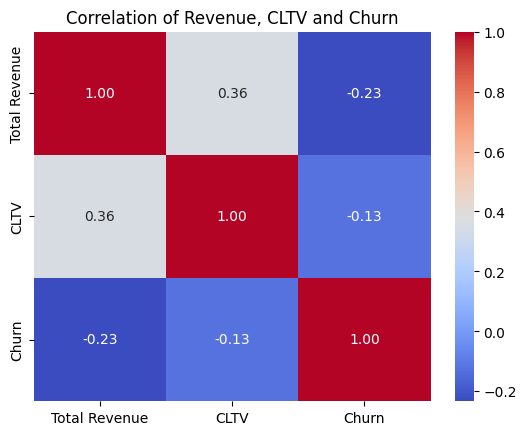

In [3]:
#Total Revenue, CLTV and Сhurn correlation

cols = ['Total Revenue', 'CLTV', 'Churn']
corr_matrix = df[cols].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Revenue, CLTV and Churn')
plt.show()


Churn Rate by category: Satisfaction Score
Satisfaction Score
1   100.00%
2   100.00%
3    15.91%
4     0.00%
5     0.00%


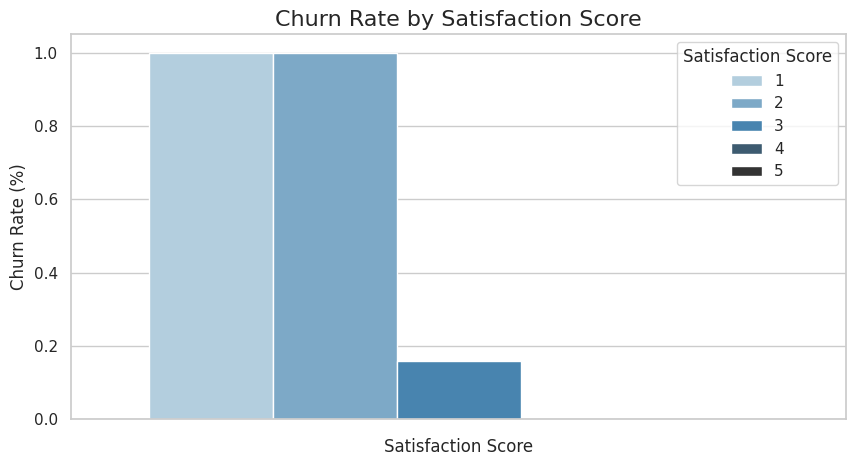

Churn Rate by category: Referred a Friend
Referred a Friend
No    32.82%
Yes   19.15%


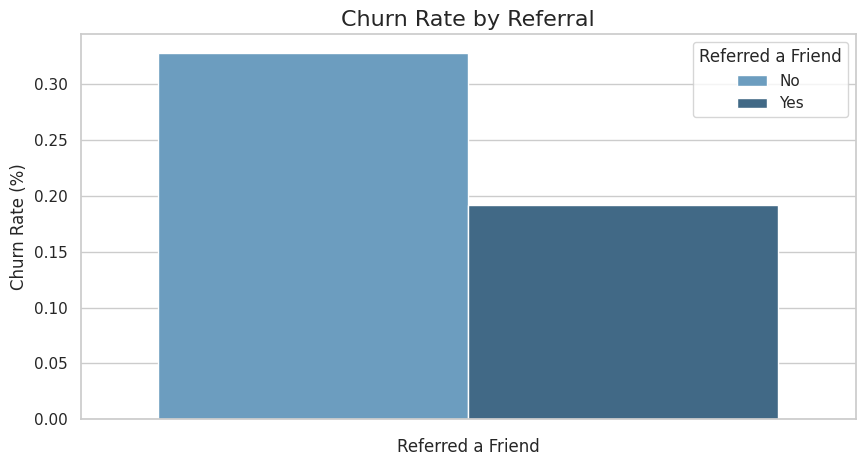

In [ ]:
#Additional Factors

#Churn Rate by Satisfaction Score
calculate_and_plot_churn_rate(df,'Satisfaction Score','Churn Rate by Satisfaction Score')

#Churn Rate by Referral
df['Referred a Friend']=df['Referred a Friend'].replace({1:'Yes', 0:'No'})
calculate_and_plot_churn_rate(df,'Referred a Friend','Churn Rate by Referral')


Churn Reasons for the category "Competitor" 
 Churn Reason
Competitor had better devices                188
Competitor made better offer                 187
Competitor offered more data                  57
Competitor offered higher download speeds     54
Name: count, dtype: int64


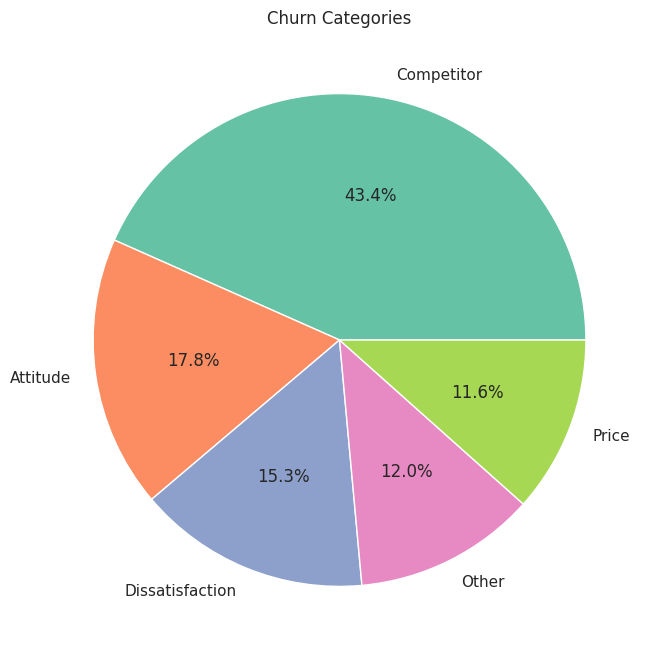

In [ ]:
#Churn Reasons Top

churned_categories = df[df['Churn'] == 1]['Churn Category'].value_counts(normalize=True) * 100
colors = sns.color_palette('Set2')[0:len(churned_categories)]
churned_categories.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Churn Categories', colors=colors)
plt.ylabel('')

#Churn reasons for the weakest category
competitor_reasons = df[df['Churn Category'] == 'Competitor']['Churn Reason'].value_counts()
print('Churn Reasons for the category "Competitor" \n', competitor_reasons)


